Plan: implement something simple for distributions

In [5]:
import jax.numpy as jnp
import jax.random as r

In [12]:
import jax

In [7]:
import optax

In [1]:
from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
tfpk = tfp.math.psd_kernels

2024-10-17 12:24:02.232123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 12:24:02.287179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 12:24:02.292230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 12:24:11.255660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
jnp.e

2.718281828459045

In [ ]:
# create a jax pytree
{'loc': jnp.array([0.])}

In [9]:
orig_key = r.key(42)
target_dist = tfd.Normal(loc=jnp.pi, scale=jnp.e)

In [10]:
start_learning_rate = 1e-1
optimizer = optax.adam(start_learning_rate)

params = {'loc': jnp.array([0.]), 'scale': jnp.array([1.])}
opt_state = optimizer.init(params)

In [11]:
def compute_loss(params, x):
    dist = tfd.Normal(loc=params['loc'], scale=params['scale'])
    return -dist.log_prob(x).sum()

In [17]:
stored_params = []

for step in range(500):
    step_key = r.fold_in(orig_key, step)
    x = target_dist.sample(100, seed=step_key)
    grads = jax.grad(compute_loss)(params, x)
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)

    if step % 20 == 0:
        print(f"Step {step}, loss {compute_loss(params, x)}")
        stored_params.append(params)

        

Step 0, loss 246.38243103027344
Step 20, loss 239.5039825439453
Step 40, loss 248.1156005859375
Step 60, loss 237.2462158203125
Step 80, loss 238.40481567382812
Step 100, loss 244.2958984375
Step 120, loss 239.80599975585938
Step 140, loss 249.5154571533203
Step 160, loss 242.93585205078125
Step 180, loss 237.2327880859375
Step 200, loss 235.9593963623047
Step 220, loss 234.7972412109375
Step 240, loss 246.87954711914062
Step 260, loss 242.3194580078125
Step 280, loss 246.61648559570312
Step 300, loss 241.71051025390625
Step 320, loss 242.84353637695312
Step 340, loss 242.5654296875
Step 360, loss 240.00872802734375
Step 380, loss 237.7791748046875
Step 400, loss 236.92547607421875
Step 420, loss 241.1415252685547
Step 440, loss 243.111083984375
Step 460, loss 242.12451171875
Step 480, loss 249.02239990234375


In [18]:
print(params)

{'loc': Array([3.111878], dtype=float32), 'scale': Array([2.8196342], dtype=float32)}


ValueError: range(0, 25) is not a valid value for color

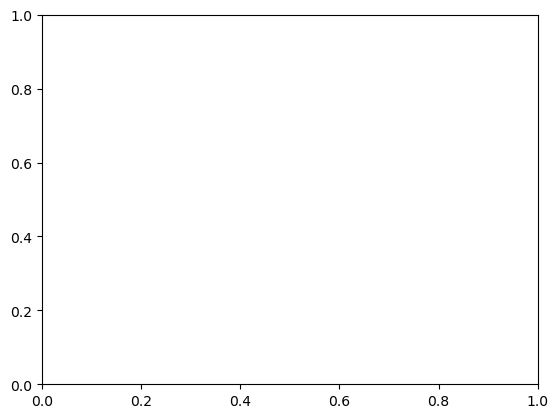

In [22]:
# plot the trajectory of the optimization
import matplotlib.pyplot as plt

plt.plot([store['loc'] for store in stored_params], [store['scale'] for store in stored_params], 'o-', color=range(len(stored_params)))

In [ ]:
plt.plot()